In [2]:
# load libraries
import pandas as pd

# Load the data set
df= pd.read_csv('data.csv')

#Display the dataset
df.head(20)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [3]:
#Data preprocessing or Data Cleaning
#Bad data handling
#wrong format  date-30062025
#wrong data -23  age=560
#Duplicates



In [21]:
# Identify missing values in the DataFrame
# This displays the count of null (NaN) entries in each column
print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [22]:
#Check Wrong formats
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [23]:
# Check for non-numeric values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values detected in column: {col}")

Non-numeric values detected in column: Calories


In [24]:
# Wrong data
# Check for negative values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col] < 0).any():
        print(f"Negative values found in column: {col}")

In [25]:
# Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found.")

Duplicates found:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [9]:
# [Data Cleaning Recommendations]
# 1. Handle missing/empty values.get average
# 2. Convert data to correct formats
# 3. Identify and correct inaccurate data
# 4. Remove duplicates in  rows not in columns

In [26]:
# Fill missing values with column mean for numeric columns
numeric_cols = ['Duration', 'Pulse', 'Maxpulse', 'Calories']
for col in numeric_cols:
    if col in df.select_dtypes(include='number').columns:
        df[col].fillna(df[col].mean(), inplace=True)
        

C:\Users\Maria\AppData\Local\Temp\ipykernel_13764\2278733787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Maria\AppData\Local\Temp\ipykernel_13764\2278733787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [27]:
df.head(20)


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


In [28]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [29]:
# EDA Exploratory Data Analysis
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (169, 4)


In [30]:
# Summary statistics
print("Summary statistics:")
df.describe()

Summary statistics:


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [15]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
#Data visualization
import matplotlib as plt
import seaborn as sns



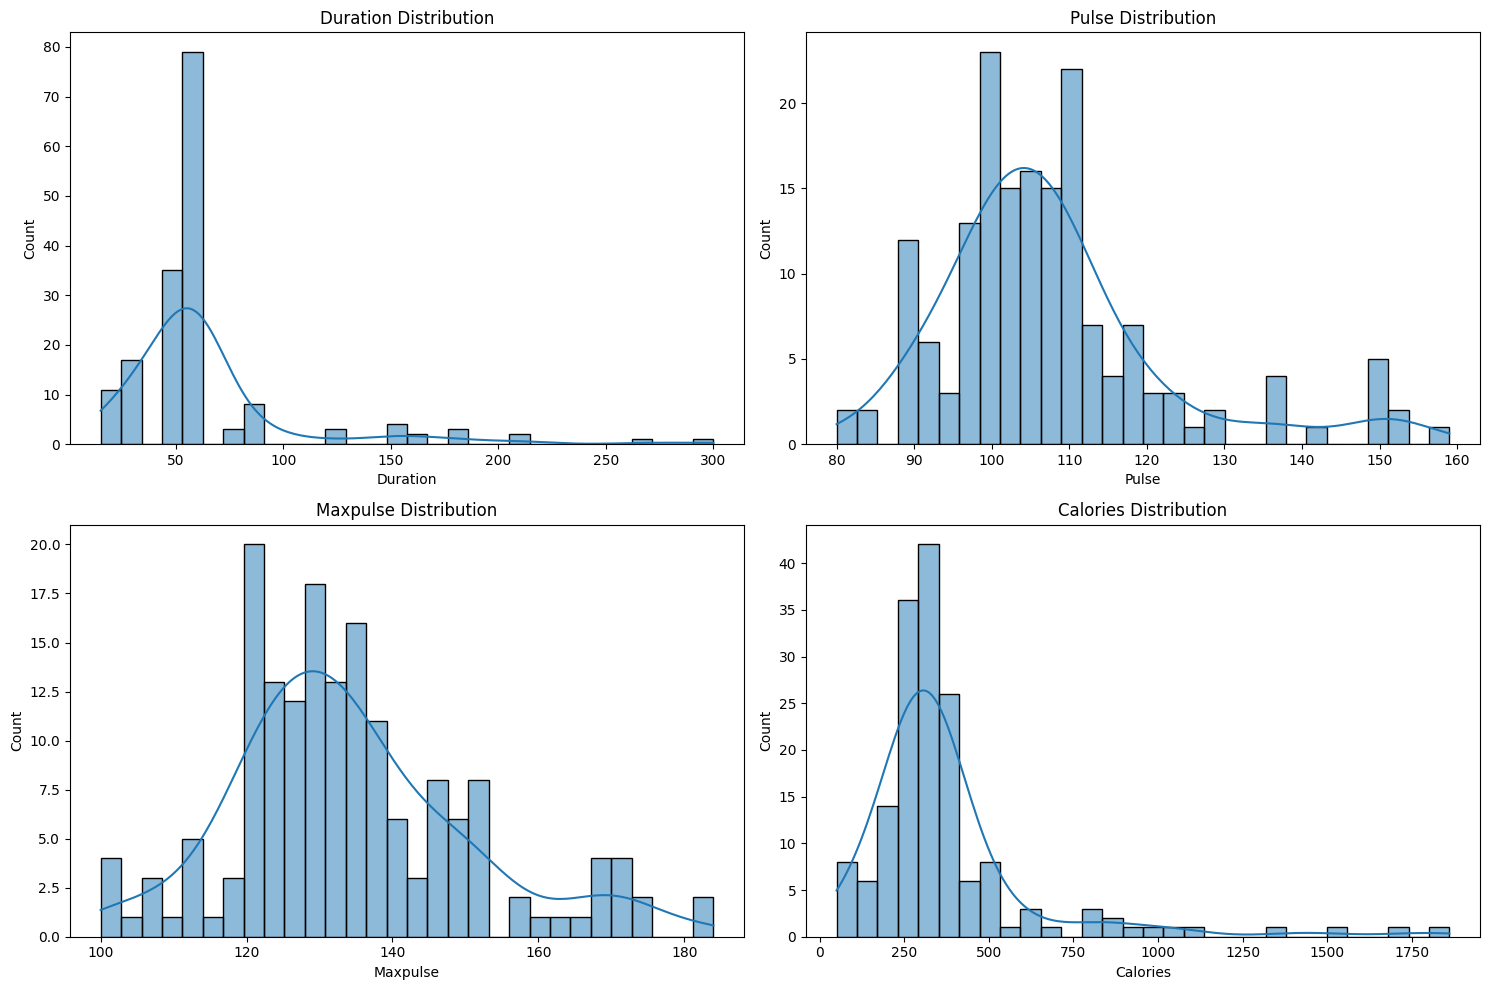

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('data.csv')

# Set up the figure with appropriate size
plt.figure(figsize=(15, 10))

# Histogram of 'Duration'
plt.subplot(2, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')

# Histogram of 'Pulse'
plt.subplot(2, 2, 2)
sns.histplot(df['Pulse'], bins=30, kde=True)
plt.title('Pulse Distribution')

# Histogram of 'Maxpulse'
plt.subplot(2, 2, 3)
sns.histplot(df['Maxpulse'], bins=30, kde=True)
plt.title('Maxpulse Distribution')

# Histogram of 'Calories'
plt.subplot(2, 2, 4)
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')

# Improve layout and show the plots
plt.tight_layout()
plt.show()


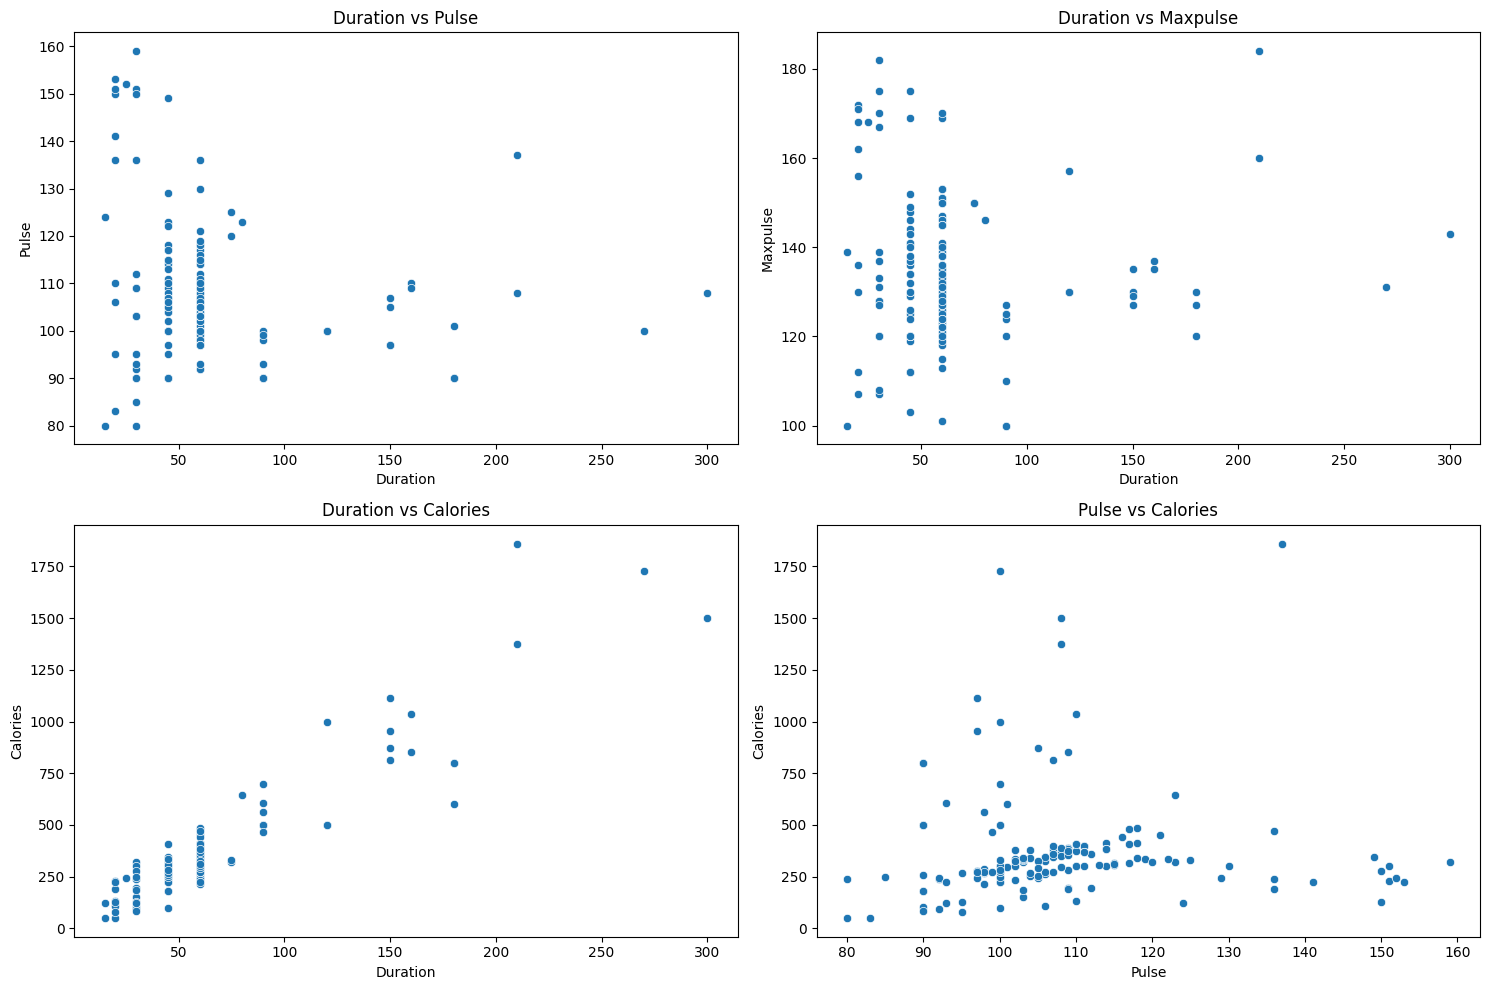

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('data.csv')  

# Set figure size
plt.figure(figsize=(15, 10))

# Scatter plot: Duration vs Pulse
plt.subplot(2, 2, 1)
sns.scatterplot(x='Duration', y='Pulse', data=df)
plt.title('Duration vs Pulse')

# Scatter plot: Duration vs Maxpulse
plt.subplot(2, 2, 2)
sns.scatterplot(x='Duration', y='Maxpulse', data=df)
plt.title('Duration vs Maxpulse')

# Scatter plot: Duration vs Calories
plt.subplot(2, 2, 3)
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title('Duration vs Calories')

# Scatter plot: Pulse vs Calories
plt.subplot(2, 2, 4)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Pulse vs Calories')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


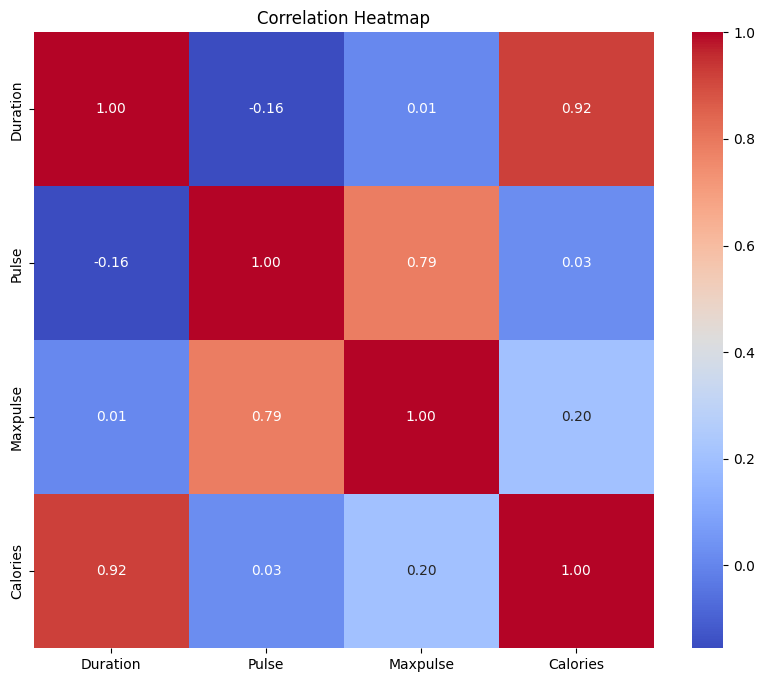

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data.csv')


# CORRELATION HEATMAP

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)  # Ensures only numeric columns are included
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
